Download heart disease dataset heart.csv in [Exercise](https://github.com/codebasics/py/tree/master/ML/18_PCA/Exercise) folder and do following, (credits of dataset:  https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1. Load heart disease dataset in pandas dataframe
1. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
1. Convert text columns to numbers using label encoding and one hot encoding
1. Apply scaling
1. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
1. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df = pd.read_csv("data_sets/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.Oldpeak.unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# Specifically check outliers for Oldpeak
oldpeak_z = (df['Oldpeak'] - df['Oldpeak'].mean()) / df['Oldpeak'].std()
oldpeak_outliers = df[oldpeak_z.abs() > 3]

print("Rows flagged as Oldpeak outliers:")
print(oldpeak_outliers[['Oldpeak']])

Rows flagged as Oldpeak outliers:
     Oldpeak
166      5.0
324     -2.6
702      4.2
771      5.6
791      4.2
850      6.2
900      4.4


In [10]:
# Identify the outliers specifically for Oldpeak again
oldpeak_z = (df['Oldpeak'] - df['Oldpeak'].mean()) / df['Oldpeak'].std()
outlier_indices = df[oldpeak_z.abs() > 3].index

# Compare the target variable (HeartDisease) for outliers vs the whole dataset
print("Target distribution for ALL patients:")
print(df['HeartDisease'].value_counts(normalize=True))

print("\nTarget distribution for OLDPEAK OUTLIERS:")
print(df.loc[outlier_indices, 'HeartDisease'].value_counts())

Target distribution for ALL patients:
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

Target distribution for OLDPEAK OUTLIERS:
HeartDisease
1    6
0    1
Name: count, dtype: int64


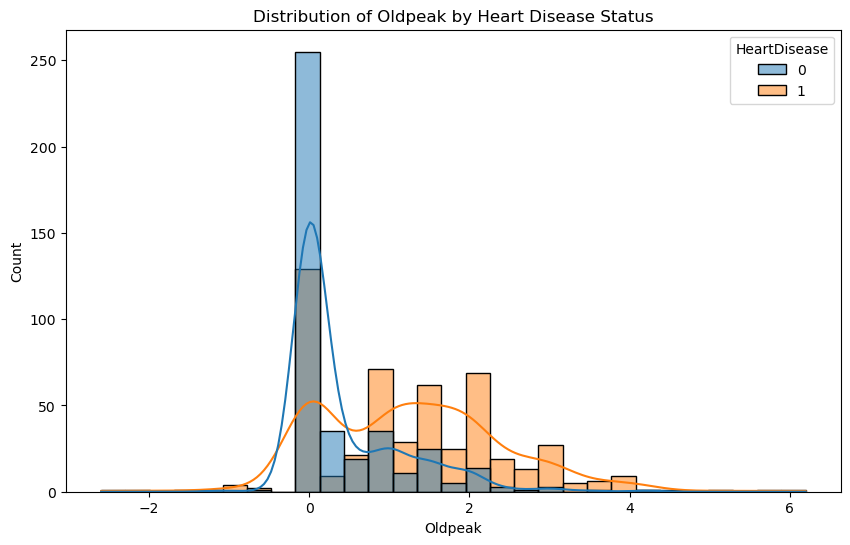

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Oldpeak', hue='HeartDisease', kde=True)
plt.title('Distribution of Oldpeak by Heart Disease Status')
plt.show()

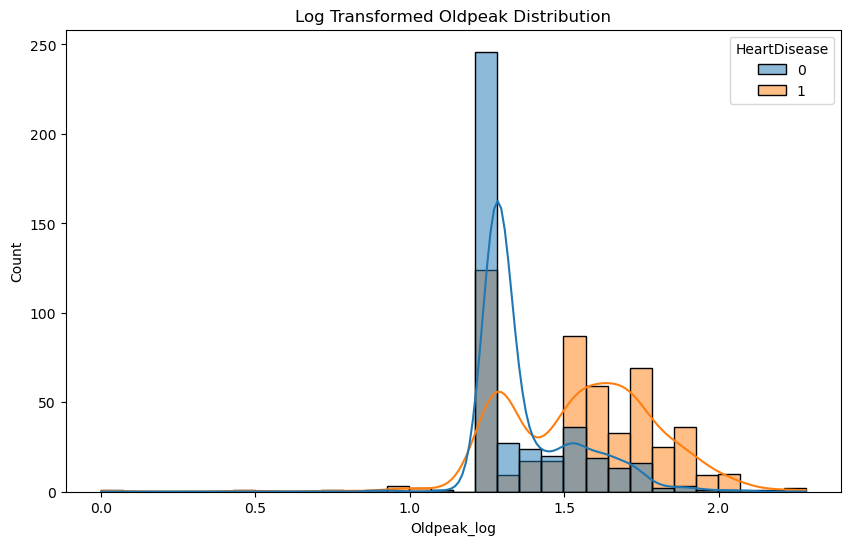

In [12]:
import numpy as np

# Apply log transformation (adding a small constant because you have 0s and negative values)
# We use log1p or a shift to handle the negative values like -2.6
df['Oldpeak_log'] = np.log1p(df['Oldpeak'] - df['Oldpeak'].min())

# Now check the distribution again
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Oldpeak_log', hue='HeartDisease', kde=True)
plt.title('Log Transformed Oldpeak Distribution')
plt.show()